In [5]:
# Name: Javier Ramirez
# Date: 11/12/18
# Purpose: Perform a data analysis on a data.gov dataset using Jupyter Notebooks.

import pandas as pd
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

raw_data = pd.read_csv('medicare.csv')
# Clean data: only take in certain columns
df = pd.DataFrame(raw_data, columns = ['DRG Definition', 'Provider State', \
                                       'Average Total Payments','Average Medicare Payments'])
# Clean data: Remove procedure number from DRG Definition column
df['DRG Definition'] = df['DRG Definition'].map(lambda x: str(x)[6:])

In [6]:
# INTERESTING 1
# create a new df with only CHEST PAIN items in it
category_only = df[(df['DRG Definition'] == 'SIMPLE PNEUMONIA & PLEURISY W CC')]

# group costs by state and average each state's cost
new_df = category_only.groupby('Provider State', as_index=False)\
['Average Total Payments'].mean()

# sort the df from highest to lowest value
sorted_df = new_df.sort_values(['Average Total Payments'], ascending=[False])

# print with new indexes, rounded to 2 decimal places
sorted_df.reset_index(drop=True, inplace=True)
sorted_df.columns=['Provider State','Average Total Payments']
decimals = 2    
sorted_df['Average Total Payments'] = sorted_df['Average Total Payments']\
.apply(lambda x: round(x, decimals))

# start formatted story text
printmd('# Looking for a good deal on your upcoming medical procedure?')
printmd('## *You might have to search out of state.*')

printmd('Even for common medical treatments, costs that patients pay can vary dramatically \
by state. Patients often receive bills for medical care they have received long after their \
hospital stay has ended, making it difficult to contest charges. It is often difficult to \
know how much a given treatment will cost in advance. Hospitals are often unable to provide \
patients a copy of their chargemaster, a master price list of all the treatments patients \
can receive.')

printmd('Costs vary dramatically – patients can pay upwards of \$10,000 in Arkansas or as \
little as under \$6,000 in Alabama for the same treatment.')

printmd('**TABLE: Simple Pneumonia & Pleuritis Treatment Costs, by state**')
printmd('*The table below lists the average amount paid for simple pneumonia and pleuritis \
(tissue inflamation) treatments in 2011.\n Source: Centers for Medicare and Medicaid \
Services.*')

# print table
sorted_df 

# Looking for a good deal on your upcoming medical procedure?

## *You might have to search out of state.*

Even for common medical treatments, costs that patients pay can vary dramatically by state. Patients often receive bills for medical care they have received long after their hospital stay has ended, making it difficult to contest charges. It is often difficult to know how much a given treatment will cost in advance. Hospitals are often unable to provide patients a copy of their chargemaster, a master price list of all the treatments patients can receive.

Costs vary dramatically – patients can pay upwards of \$10,000 in Arkansas or as little as under \$6,000 in Alabama for the same treatment.

**TABLE: Simple Pneumonia & Pleuritis Treatment Costs, by state**

*The table below lists the average amount paid for simple pneumonia and pleuritis (tissue inflamation) treatments in 2011.
 Source: Centers for Medicare and Medicaid Services.*

,Provider State,Average Total Payments
0,AK,NaN
1,AL,NaN
2,AR,NaN
3,AZ,NaN
4,CA,NaN
5,CO,NaN
6,CT,NaN
7,DC,NaN
8,DE,NaN
9,FL,NaN


# Costs Vary Dramatically Across the Top 100 Most Diagnosed Conditions.

## *National Trends Point Toward Cost Variance*

When we combine and average the costs that patients pay for treatment of the top 100 most diagnosed conditions, we can see that much variation exsts in the amount that patients pay, on average, between states.

**TABLE: Average Cost of Procedure, by state.**

*The table below shows the average cost of a procedure in each state, based on data from the top 100 diagnosed procedures nationwide. 
 Source: Centers for Medicare and Medicaid Services.*

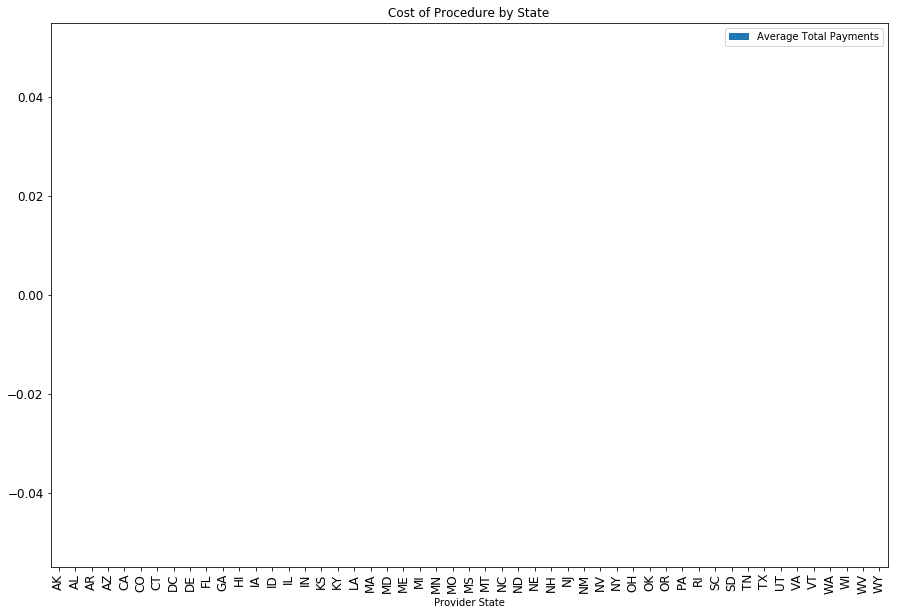

In [7]:
# INTERESTING 2

# start formatted story text
printmd('# Costs Vary Dramatically Across the Top 100 Most Diagnosed Conditions.')
printmd('## *National Trends Point Toward Cost Variance*')

printmd('When we combine and average the costs that patients pay for treatment of \
the top 100 most diagnosed conditions, we can see that much variation exsts in the \
amount that patients pay, on average, between states.')

printmd('**TABLE: Average Cost of Procedure, by state.**')
printmd('*The table below shows the average cost of a procedure in each state, based on \
data from the top 100 diagnosed procedures nationwide. \n Source: Centers for Medicare \
and Medicaid Services.*')

# BEGIN TABLE

# create a new df to use for this example, based on raw data
nationwide_data = df

# group costs by state and average each state's cost
nationwide_sorted = nationwide_data.groupby('Provider State', as_index=False)\
['Average Total Payments'].mean()

# create and print graphs
nationwide_sorted_df = nationwide_sorted.sort_values(['Average Total Payments'], ascending=[False])
ax = nationwide_sorted_df[['Provider State','Average Total Payments']].plot(kind='bar', title ="Cost of Procedure by State", x='Provider State', y='Average Total Payments',figsize=(15, 10), legend=True, fontsize=12)

In [8]:
# INTERESTING 3

# start formatted story text
printmd('# Medicare Disburses Similar Amounts to Nearly All States.')
printmd('## *Insurance for All*')

printmd('When we combine and average the costs that patients pay for treatment of \
the top 100 most diagnosed conditions, we can see that much variation exsts in the \
amount that patients pay, on average, between states.')

printmd('**TABLE: Proportion of Treatment Amounts Covered by Medicare.**')
printmd('*The table below shows the proportion of treatment costs covered by Medicare by state, based on \
data from the top 100 diagnosed procedures nationwide. The top 15 amounts are shown. \n Source: Centers for Medicare \
and Medicaid Services.*')

# BEGIN TABLE

# create a new df to use for this example, based on raw data
nationwide_medicare_data = df

# group costs by state and average each state's cost
nationwide_medicare_sorted = nationwide_medicare_data.groupby('Provider State', as_index=False)\
['Average Medicare Payments'].mean()

# sort from highest to lowest
nationwide_medicare_sorted = nationwide_medicare_sorted.sort_values(['Average Medicare Payments'], ascending=[False])

# print with new indexes, rounded to 2 decimal places, top 15
nationwide_medicare_sorted.reset_index(drop=True, inplace=True)
nationwide_medicare_sorted.columns=['Provider State','Average Medicare Payments']
decimals = 2    
nationwide_medicare_sorted['Average Medicare Payments'] = nationwide_medicare_sorted['Average Medicare Payments']\
.apply(lambda x: round(x, decimals))

nationwide_medicare_sorted[:15]


# Medicare Disburses Similar Amounts to Nearly All States.

## *Insurance for All*

When we combine and average the costs that patients pay for treatment of the top 100 most diagnosed conditions, we can see that much variation exsts in the amount that patients pay, on average, between states.

**TABLE: Proportion of Treatment Amounts Covered by Medicare.**

*The table below shows the proportion of treatment costs covered by Medicare by state, based on data from the top 100 diagnosed procedures nationwide. The top 15 amounts are shown. 
 Source: Centers for Medicare and Medicaid Services.*

,Provider State,Average Medicare Payments
0,AK,12958.97
1,DC,11811.97
2,CA,11494.38
3,MD,11480.12
4,HI,10967.48
5,NY,10620.74
6,VT,10546.97
7,CT,10104.59
8,NJ,9586.94
9,WY,9539.39
